In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time as t
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [24]:
data = pd.read_csv("/content/WineQuality.csv")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


In [51]:
sns.pairplot(data, hue = 'quality')

Output hidden; open in https://colab.research.google.com to view.

In [25]:
names = data.columns
names

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Type'],
      dtype='object')

In [27]:
X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]]
y = data.iloc[:, [12]]

In [28]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  Type                  32485 non-null  object 
dtypes: float64(11), object(1)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 1 columns):
 #   Column   No

(None, None)

In [29]:
X.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,7.4,0.170,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,White Wine
1,5.3,0.310,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,White Wine
2,4.7,0.145,0.29,1.00,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,White Wine
3,6.9,0.260,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,White Wine
4,6.4,0.450,0.07,1.10,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,White Wine
5,8.4,0.320,0.35,11.70,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,White Wine
6,7.4,0.300,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,White Wine
7,7.0,0.320,0.29,7.60,0.025,35.0,124.0,0.99162,3.15,0.65,12.8,White Wine
8,6.7,0.460,0.27,5.20,0.039,35.0,96.0,0.99129,3.16,0.44,12.4,White Wine
9,6.4,0.250,0.30,5.50,0.038,15.0,129.0,0.99480,3.14,0.49,9.6,White Wine


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  Type                  32485 non-null  object 
dtypes: float64(11), object(1)
memory usage: 3.0+ MB


In [33]:
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
    (OneHotEncoder(), [11]),
    remainder = "passthrough"
)
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
                                ('onehotencoder', OneHotEncoder(), [11])])

In [34]:
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)
X_train_norm.shape, y_train.shape

((25988, 13), (25988, 1))

In [35]:
X_train_norm

array([[0.32231405, 0.18      , 0.27710843, ..., 0.14492754, 0.        ,
        1.        ],
       [0.23966942, 0.14666667, 0.26506024, ..., 0.15942029, 0.        ,
        1.        ],
       [0.42975207, 0.49333333, 0.03012048, ..., 0.28985507, 1.        ,
        0.        ],
       ...,
       [0.20661157, 0.16666667, 0.1626506 , ..., 0.20289855, 0.        ,
        1.        ],
       [0.33057851, 0.12      , 0.29518072, ..., 0.33333333, 0.        ,
        1.        ],
       [0.19008264, 0.18      , 0.04216867, ..., 0.17391304, 0.        ,
        1.        ]])

In [36]:
X_test_norm.shape, y_test.shape

((6497, 13), (6497, 1))

In [37]:
y_train.quality.unique()

array([5, 6, 7, 8, 4, 3, 9])

In [38]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_0.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])
model_0.fit(X_train_norm, y_train,
          epochs = 50,
          validation_data = [X_test_norm, y_test])

Epoch 1/50
813/813 [==============================] - 3s 3ms/step - loss: 4.0317 - mae: 4.0317 - val_loss: 2.3569 - val_mae: 2.3569
Epoch 2/50
813/813 [==============================] - 1s 2ms/step - loss: 1.2593 - mae: 1.2593 - val_loss: 0.7714 - val_mae: 0.7714
Epoch 3/50
813/813 [==============================] - 1s 2ms/step - loss: 0.7171 - mae: 0.7171 - val_loss: 0.6848 - val_mae: 0.6848
Epoch 4/50
813/813 [==============================] - 1s 2ms/step - loss: 0.6731 - mae: 0.6731 - val_loss: 0.6616 - val_mae: 0.6616
Epoch 5/50
813/813 [==============================] - 1s 2ms/step - loss: 0.6540 - mae: 0.6540 - val_loss: 0.6445 - val_mae: 0.6445
Epoch 6/50
813/813 [==============================] - 2s 2ms/step - loss: 0.6388 - mae: 0.6388 - val_loss: 0.6292 - val_mae: 0.6292
Epoch 7/50
813/813 [==============================] - 1s 2ms/step - loss: 0.6264 - mae: 0.6264 - val_loss: 0.6168 - val_mae: 0.6168
Epoch 8/50
813/813 [==============================] - 2s 2ms/step - loss: 0.

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_norm, y_train)
print(f"Accuracy: {model.score(X_test_norm, y_test)*100} %");

<ipython-input-45-945384cb5175>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_norm, y_train)


Accuracy: 99.56903186085886 %


In [40]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train_norm, y_train)
print(f"Test Accuracy: {model1.score(X_test_norm, y_test)*100} %")

Test Accuracy: 99.35354779128829 %


In [41]:
model1.predict(X_test_norm)

array([7, 5, 5, ..., 7, 6, 6])

In [42]:
cfg = confusion_matrix(model.predict(X_test_norm), y_test)
cfg

array([[  19,    0,    0,    0,    0,    0,    0],
       [   0,  222,    0,    0,    0,    0,    0],
       [   0,    0, 2112,    9,    0,    0,    0],
       [   0,    2,   11, 2804,    5,    2,    0],
       [   0,    0,    0,    2, 1125,    0,    0],
       [   0,    0,    0,    0,    0,  179,    0],
       [   0,    0,    0,    0,    0,    0,    5]])

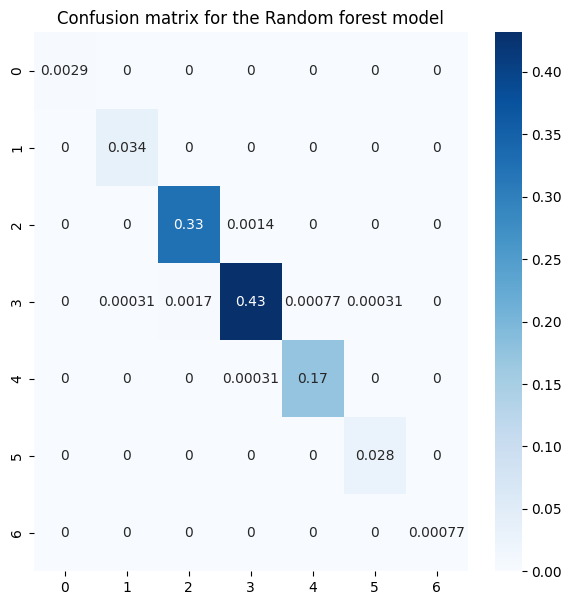

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7, 7))
sns.heatmap(cfg/np.sum(cfg), annot = True, cmap = 'Blues')
plt.title("Confusion matrix for the Random forest model");